## Esercitazione 8  dell'   8  Aprile 2025


## Condizionamento del problema della soluzione di un sistema lineare

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0\\
0\\
0
\end{array}
\right ]
$$
- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [2]:
x=np.arange(1.0, 7.0) 
A=np.vander(x,increasing=True)

condA=np.linalg.cond(A,1) # verify |A|*|A^-1|
print(A)
b=np.sum(A,axis=1).reshape(6,1)
b

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03 7.776e+03]]


array([[6.000e+00],
       [6.300e+01],
       [3.640e+02],
       [1.365e+03],
       [3.906e+03],
       [9.331e+03]])

In [3]:
x=np.linalg.solve(A,b)

In [4]:
bp=b.copy()
bp[0]=bp[0]+0.025
xp=np.linalg.solve(A,bp)

input_error=np.linalg.norm(bp-b,1)/np.linalg.norm(b,1)
output_error=np.linalg.norm(xp-x,1)/np.linalg.norm(x,1)
print("input error: ", input_error, "output error: ", output_error)

input error:  1.6627868307283243e-06 output error:  0.08750000000720815


## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [5]:
A=np.array([[6.0,63.0,662.2],[63.0,662.2,6967.8],[662.2,6967.8,73393.5664]])
b=np.array([1.1,2.33,1.7])
x=np.linalg.solve(A,b)

Ap=A.copy()
Ap[0][0]=Ap[0][0]+0.01
xp=np.linalg.solve(Ap,b)

print(x,xp)

input_error=np.linalg.norm(Ap-A,1)/np.linalg.norm(A,1)
output_error=np.linalg.norm(xp-x,1)/np.linalg.norm(x,1)
print("input error: ", input_error, "output error: ", output_error)

[136422.3375037  -25999.49955428   1237.44419646] [67.09867276 -9.66739506  0.3124175 ]
input error:  1.2342088165597937e-07 output error:  0.9995290307722452


## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

## Metodi diretti per la soluzione numerica di un sistema lineare

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [5]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


A= [[2 1]
 [3 4]]
L= [[1.         0.        ]
 [0.66666667 1.        ]]
U= [[ 3.          4.        ]
 [ 0.         -1.66666667]]
P= [[0. 1.]
 [1. 0.]]
Matrice P*A 
 [[3. 4.]
 [2. 1.]]
Matrice ottenuta moltipicando Le ed U 
 [[3. 4.]
 [2. 1.]]


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

In [7]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

[[ 2  1  3]
 [ 1  5  7]
 [ 3  7 12]]


In [8]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

[[1.41421356 0.         0.        ]
 [0.70710678 2.12132034 0.        ]
 [2.12132034 2.59272486 0.8819171 ]]
A1=
 [[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [9]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q=",Q)
print("R=",R)
A1=Q@R
print(A1)

Q= [[-0.53452248  0.6882472  -0.49051147]
 [-0.26726124 -0.6882472  -0.67445327]
 [-0.80178373 -0.22941573  0.55182541]]
R= [[ -3.74165739  -7.48331477 -13.09580085]
 [  0.          -4.35889894  -5.50597761]
 [  0.           0.           0.42919754]]
[[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [1]:
import SolveTriangular as st
def LUsolve(P,L,U,b):
    y,flag=st.Lsolve(L,P@b)
    if flag==0:
        x,flag=st.Usolve(U,y)
        if flag!=0:
            return [],flag
    else:
        return [],flag
    return x,flag

In [19]:
A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]])
b=np.sum(A,axis=1).reshape(4,1)
PT,L,U=sp.linalg.lu(A)
P=PT.T.copy()
x,flag=LUsolve(P,L,U,b)
x

array([[1.],
       [1.],
       [1.],
       [1.]])

## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

In [11]:
def solve_nsis(A,B):
    m,n=A.shape

    if m!=n:
        print("Matrix A is not square.")
        return
    X=np.zeros((m,m))
    PT,L,U = lu(A) # lu(A) => A=P@L@U -> PA=LU <=> A=P.T@L@U  
    P=PT.T.copy()

    for i in range(m):
        x,flag=LUsolve(P,L,U,B[:,i])
        #y,flag=st.Lsolve(L,P@B[:,i])
        #x,flag=st.Usolve(U,y)
        X[:,i]=x.reshape(n,)
    return X

In [12]:
A1=np.array([[3,5,7],[2,3,4],[5,9,11]])
A2=np.array([[1,2,3,4],[2,-4,6,8],[-1,-2,-3,-1],[5,7,0,1]])

B1=np.eye(A1.shape[0])
B2=np.eye(A2.shape[0])

print("My invs: ", solve_nsis(A1,B1))
print("SciPy: ", sp.linalg.inv(A1))
print("My invs: ", solve_nsis(A2,B2))
print("SciPy: ", sp.linalg.inv(A2))

My invs:  [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
SciPy:  [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
My invs:  [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01 -0.00000000e+00 -8.16340459e-18]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  4.62592927e-18  3.33333333e-01 -9.25185854e-18]]
SciPy:  [[-4.16666667e-01  1.75000000e-01 -6.66666667e-02  2.00000000e-01]
 [ 2.50000000e-01 -1.25000000e-01  2.77555756e-17  0.00000000e+00]
 [-1.38888889e-01  2.50000000e-02 -4.22222222e-01 -6.66666667e-02]
 [ 3.33333333e-01  3.46944695e-18  3.33333333e-01 -1.38777878e-17]]


## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [ ]:
PT,L_1,U_1=lu(A_2)
P=PT.copy()
deterA2=np.prod(np.diag(U_1))*np.linalg.det(P)
#In realtà bisognerebbe risalire al numero di scambi effettuati s dall'algoritmo di Gauss con pivoting e calcolare det(P)=(-1)**s,
#ma mi interessa solo sapere il risultato teorico e quindi potete tranquillamente usare la funzione np.linalg.det per calcolare det(P)
print("determinante sfruttando fattorizzazione LU",deterA2,"determinante sfruttando la funzione np.linalg.det ", np.linalg.det(A_2))

## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

In [29]:
def Hankel(n):
    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

In [1]:
errLU=[]
errQR=[]
for i in range(4,41,6):
    An=Hankel(i)
    xOnes=np.ones((i,1))
    b=np.dot(An,xOnes)
    
    PT,L,U=lu(An)
    P=PT.T.copy()
    
    x,flag=LUsolve(P,L,U,b)
    errLU.append(np.linalg.norm(x-xOnes,2)/np.linalg.norm(xOnes,2))
    
    Q,R=sp.linalg.qr(An)
    y=Q.T@b
    x,flag=st.Usolve(R,y)
    errQR.append(np.linalg.norm(x-xOnes,2)/np.linalg.norm(xOnes,2))

plt.loglog(range(4,41,6),errLU,'ro-',range(4,41,6),errQR,'go-')
plt.legend(['LU','QR'])
plt.ylabel('Relative Error')
plt.show()

NameError: name 'Hankel' is not defined

## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

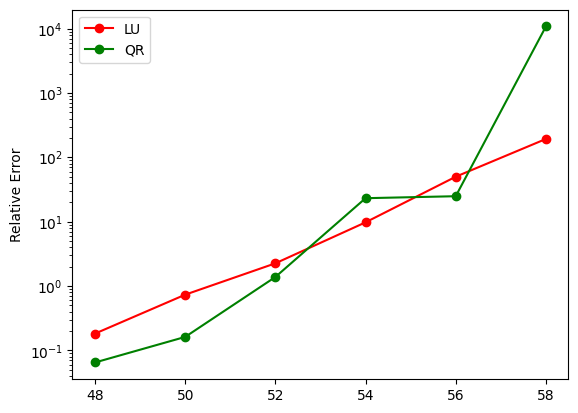

In [60]:
def matrix(n):
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i==j or j==n-1:
                A[i,j]=1
            elif i>j:
                A[i,j]=-1
            else:
                A[i,j]=0

errLU=[]
errQR=[]
for i in range(48,59,2):
    An=Hankel(i)
    xOnes=np.ones((i,1))
    b=np.dot(An,xOnes)
    
    PT,L,U=lu(An)
    Q,R=sp.linalg.qr(An)
    P=PT.T.copy()
    
    x,flag=LUsolve(P,L,U,b)
    errLU.append(np.linalg.norm(x-xOnes,2)/np.linalg.norm(xOnes,2))
    
    y=Q.T@b
    x,flag=st.Usolve(R,y)
    errQR.append(np.linalg.norm(x-xOnes,2)/np.linalg.norm(xOnes,2))

plt.semilogy(range(48,59,2),errLU,'ro-',range(48,59,2),errQR,'go-')
plt.legend(['LU','QR'])
plt.ylabel('Relative Error')
plt.show()